# **1. Adult Income Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from matplotlib.lines import Line2D
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income']

In [5]:
train_df = pd.read_csv("Adult Income Dataset/adult.data", names=columns, sep=",\s", engine="python")
test_df = pd.read_csv("Adult Income Dataset/adult.test", names=columns, sep=",\s", engine="python")

In [6]:
train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
test_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **Memeriksa Info Dataset (Jumlah Kolom, Baris, Fitur Numerik & Kategorikal)**

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16282 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education_num   16281 non-null  float64
 5   marital_status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital_gain    16281 non-null  float64
 11  capital_loss    16281 non-null  float64
 12  hours_per_week  16281 non-null  float64
 13  native_country  16281 non-null  object 
 14  income          16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [10]:
train_df_len = len(train_df)
test_df_len = len(test_df)

print("Total row (Train) : ", train_df_len)
print("Total row (Test) : ", test_df_len)

Total row (Train) :  32561
Total row (Test) :  16282


In [11]:
import pandas as pd

def print_feature_types(df, dataset_name):
    numeric_int_features = df.select_dtypes(include="int").columns.tolist()
    numeric_float_features = df.select_dtypes(include="float").columns.tolist()
    categorical_features = df.select_dtypes(include="object").columns.tolist()

    if numeric_int_features:
        print(f"Integer Numeric features ({dataset_name}): {', '.join(numeric_int_features)}")
    else:
        print(f"No integer numeric features found in {dataset_name}.")

    if numeric_float_features:
        print(f"Float Numeric features ({dataset_name}): {', '.join(numeric_float_features)}")
    else:
        print(f"No float numeric features found in {dataset_name}.")

    if categorical_features:
        print(f"Categorical features ({dataset_name}): {', '.join(categorical_features)}")
    else:
        print(f"No categorical features found in {dataset_name}.")

    print()

print_feature_types(train_df, "Train")
print_feature_types(test_df, "Test")


Integer Numeric features (Train): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
No float numeric features found in Train.
Categorical features (Train): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

No integer numeric features found in Test.
Float Numeric features (Test): fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
Categorical features (Test): age, workclass, education, marital_status, occupation, relationship, race, sex, native_country, income



#### **Fitur dan Tipe Data Dataset Adult Income**

> Dataset Adult Income berisi informasi demografis individu, dengan tujuan untuk memprediksi apakah pendapatan mereka melebihi $50.000 per tahun. Di bawah ini adalah ringkasan fitur-fitur beserta tipe datanya:

| Fitur              | Tipe Data   | Deskripsi                                               |
|--------------------|-------------|--------------------------------------------------------|
| **age**            | `int`       | Usia individu.                                         |
| **workclass**      | `object`    | Kategori pekerjaan individu.                           |
| **fnlwgt**         | `int`       | Bobot akhir yang ditugaskan kepada individu dalam survei. |
| **education**      | `object`    | Tingkat pendidikan yang dicapai oleh individu.        |
| **education_num**  | `int`       | Kode numerik yang mewakili tingkat pendidikan individu.|
| **marital_status** | `object`    | Status pernikahan individu.                           |
| **occupation**     | `object`    | Pekerjaan individu.                                   |
| **relationship**   | `object`    | Status hubungan individu.                             |
| **race**           | `object`    | Ras individu.                                        |
| **sex**            | `object`    | Jenis kelamin individu.                              |
| **capital_gain**   | `int`       | Keuntungan modal individu.                           |
| **capital_loss**   | `int`       | Kerugian modal individu.                             |
| **hours_per_week** | `int`       | Jumlah jam kerja individu per minggu.                |
| **native_country** | `object`    | Negara asal individu.                                |
| **income**         | `object`    | Label pendapatan individu.   

#### **Ringkasan Tipe Data**
- **Numerik (`int`)**: age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
- **Kategorikal (`object`)**: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

#### **Verifikasi Tipe Data pada DataFrame Train dan Test**

> Setelah memeriksa tipe data di DataFrame `train_df` dan `test_df`, ditemukan bahwa beberapa fitur memiliki tipe data yang tidak sesuai. Sebagai berikut:

- Di `test_df`: 
  - **age** bertipe `object`, tetapi seharusnya bertipe `int`.
  - **fnlwgt** bertipe `float64`, tetapi seharusnya bertipe `int`.
  - **education_num** bertipe `float64`, tetapi seharusnya bertipe `int`.
  - **capital_gain** bertipe `float64`, tetapi seharusnya bertipe `int`.
  - **capital_loss** bertipe `float64`, tetapi seharusnya bertipe `int`.
  - **hours_per_week** bertipe `float64`, tetapi seharusnya bertipe `int`.

> Oleh karena itu, perlu untuk mengonversi fitur-fitur dengan tipe data yang tidak sesuai sebelum melanjutkan ke proses berikutnya.

In [12]:
test_df = test_df.drop(index=0).reset_index(drop=True)
test_df['age'] = pd.to_numeric(test_df['age'], errors='coerce').astype('Int64')
test_df['fnlwgt'] = test_df['fnlwgt'].astype('Int64')
test_df['education_num'] = test_df['education_num'].astype('Int64')
test_df['capital_gain'] = test_df['capital_gain'].astype('Int64')
test_df['capital_loss'] = test_df['capital_loss'].astype('Int64')
test_df['hours_per_week'] = test_df['hours_per_week'].astype('Int64')

In [13]:
print_feature_types(train_df, "Train")
print_feature_types(test_df, "Test")

Integer Numeric features (Train): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
No float numeric features found in Train.
Categorical features (Train): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

Integer Numeric features (Test): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
No float numeric features found in Test.
Categorical features (Test): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income



> Setelah memperbaiki tipe data kolom `age, fnlwgt, education_num, capital_gain, capital_loss, dan hours_per_week` dalam DataFrame `test_df`, sekarang dataset siap untuk proses selanjutnya.

### **Cek Missing Values, Duplicates dan Penanganan**

In [14]:
def check_missing_and_duplicates(df, dataset_name):
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    
    if total_missing > 0:
        print(f"Missing values in {dataset_name}:")
        print(missing_values[missing_values > 0])
    else:
        print(f"No missing values found in {dataset_name}.")

    duplicate_count = df.duplicated().sum()
    
    if duplicate_count > 0:
        print(f"Duplicate rows in {dataset_name}: {duplicate_count}")
    else:
        print(f"No duplicates found in {dataset_name}.")


In [15]:
check_missing_and_duplicates(train_df, "Train")

No missing values found in Train.
Duplicate rows in Train: 24


In [16]:
check_missing_and_duplicates(test_df, "Test")

No missing values found in Test.
Duplicate rows in Test: 5


> Terdapat 24 duplicate value di `train_df` dan 5 duplicate value di `test_df`. Selanjutnya, memeriksa data spesifik yang terduplicate.

In [17]:
def display_duplicate(df, dataset_name):
    duplicate_mask = df.duplicated(keep=False)
    duplicates = df[duplicate_mask]

    if not duplicates.empty:
        print(f"Unique groups of duplicate rows in {dataset_name}:\n")
        unique_duplicates = duplicates.drop_duplicates()
        display(unique_duplicates)
    else:
        print(f"No duplicate rows found in {dataset_name}.")

In [18]:
display_duplicate(train_df, "Train")

Unique groups of duplicate rows in Train:



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,>50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
5842,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
7053,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [19]:
display_duplicate(test_df, "Test")

Unique groups of duplicate rows in Test:



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
488,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K.
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.
3900,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.
7021,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K.
9249,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.


> Setelah itu, hapus data duplicate.

In [20]:
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [21]:
check_missing_and_duplicates(train_df, "Train")

No missing values found in Train.
No duplicates found in Train.


In [22]:
check_missing_and_duplicates(test_df, "Test")

No missing values found in Test.
No duplicates found in Test.


> Setelah menyelesaikan proses cek missing values, menangani data duplicate, data siap digunakan untuk proses selanjutnya.

#### **Cek Unique Values pada Semua Fitur** 

In [23]:
def check_unique_values(df, dataset_name):
    print(f"Unique values in {dataset_name} DataFrame:")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nFeature: {column}")
        print(f"Number of unique values: {len(unique_values)}")
        print("Unique values:", unique_values)

In [24]:
check_unique_values(train_df, "Train")

Unique values in Train DataFrame:

Feature: age
Number of unique values: 73
Unique values: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Feature: workclass
Number of unique values: 9
Unique values: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature: fnlwgt
Number of unique values: 21648
Unique values: [ 77516  83311 215646 ...  34066  84661 257302]

Feature: education
Number of unique values: 16
Unique values: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Feature: education_num
Number of unique values: 16
Unique values: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Feature: marital_status
Number of unique v

In [25]:
check_unique_values(test_df, "Test")

Unique values in Test DataFrame:

Feature: age
Number of unique values: 73
Unique values: <IntegerArray>
[25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20, 37, 40,
 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30, 47, 41, 19, 69,
 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77, 80, 62, 35, 68, 66, 75,
 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85, 76, 84, 89, 88, 87]
Length: 73, dtype: Int64

Feature: workclass
Number of unique values: 9
Unique values: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature: fnlwgt
Number of unique values: 12787
Unique values: <IntegerArray>
[226802,  89814, 336951, 160323, 103497, 198693, 227026, 104626, 369667,
 104996,
 ...
 269623, 139347, 224655, 173449,  89686, 440129, 350977, 349230, 321403,
  83891]
Length: 12787, dtype: Int64

Feature: education
Number of unique values: 16
Unique values: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Pr

#### **Menghapus Unique Values yang Tidak Sesuai** 

> Setelah melihat unique values, terlihat bahwa beberapa fitur mengandung nilai `?`. Nilai ini perlu dihapus. Berikut adalah rinciannya:

**train_df**
- `?` di workclass
- `?` di occupation
- `?` di native_country

**test_df**
- `?` di workclass
- `?` di occupation 
- `?` di native_country

In [26]:
def remove_question_marks(df):
    df.replace("?", np.nan, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [27]:
train_df = remove_question_marks(train_df)
test_df = remove_question_marks(test_df)

### **Analisis Statistik Distribusi dan Korelasi pada Data**

In [28]:
def analyze_numeric_correlation(df):
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    return correlation_matrix.round(2)

In [29]:
analyze_numeric_correlation(train_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.00,-0.08,0.04,0.08,0.06,0.10
fnlwgt,-0.08,1.00,-0.05,0.00,-0.01,-0.02
education_num,0.04,-0.05,1.00,0.12,0.08,0.15
capital_gain,0.08,0.00,0.12,1.00,-0.03,0.08
capital_loss,0.06,-0.01,0.08,-0.03,1.00,0.05
hours_per_week,0.10,-0.02,0.15,0.08,0.05,1.00


In [30]:
analyze_numeric_correlation(test_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.00,-0.07,0.03,0.08,0.06,0.10
fnlwgt,-0.07,1.00,-0.04,-0.01,0.01,-0.01
education_num,0.03,-0.04,1.00,0.13,0.09,0.13
capital_gain,0.08,-0.01,0.13,1.00,-0.03,0.09
capital_loss,0.06,0.01,0.09,-0.03,1.00,0.06
hours_per_week,0.10,-0.01,0.13,0.09,0.06,1.00


In [31]:
def analyze_numerical_features(df):
    descriptive_stats = df.describe()
    return descriptive_stats.round(2)

In [32]:
analyze_numerical_features(train_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30139.00,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,1092.84,88.44,40.93
std,13.13,105658.62,2.55,7409.11,404.45,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117627.50,9.00,0.00,0.00,40.00
50%,37.00,178417.00,10.00,0.00,0.00,40.00
75%,47.00,237604.50,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [33]:
analyze_numerical_features(test_df)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15055.0,15055.0,15055.0,15055.0,15055.0,15055.0
mean,38.77,189623.4,10.11,1120.67,89.07,40.95
std,13.38,105608.09,2.56,7704.43,406.35,12.06
min,17.0,13492.0,1.0,0.0,0.0,1.0
25%,28.0,116657.0,9.0,0.0,0.0,40.0
50%,37.0,177955.0,10.0,0.0,0.0,40.0
75%,48.0,238589.5,13.0,0.0,0.0,45.0
max,90.0,1490400.0,16.0,99999.0,3770.0,99.0


### **Visualisasi Distribusi dan Korelasi pada Data**

#### **Cek Korelasi antar Fitur** 

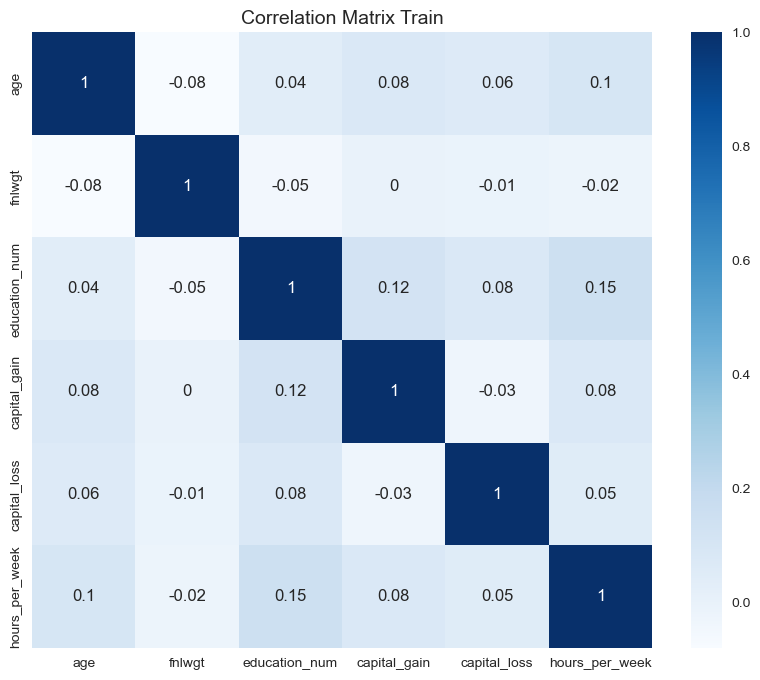

In [34]:
numeric_columns = train_df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix Train", size=14)
plt.show()

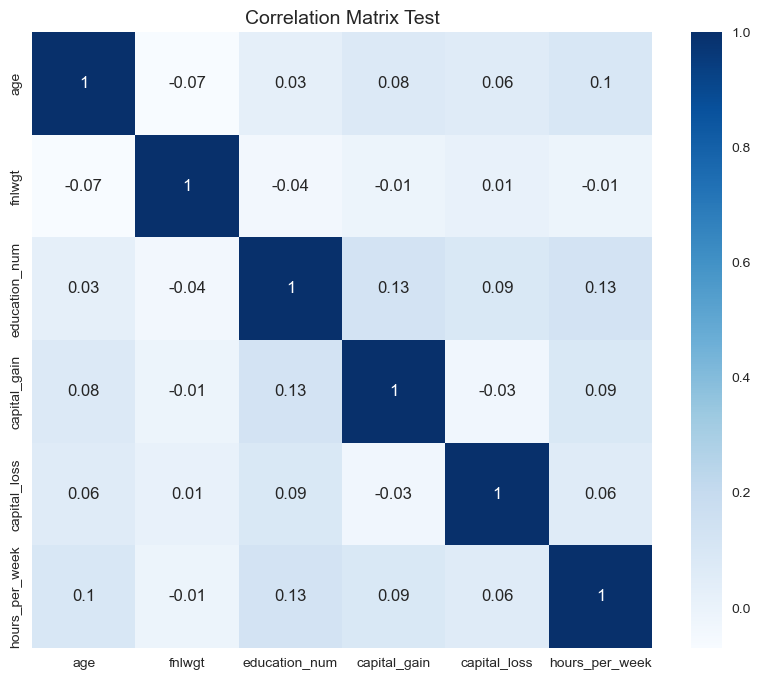

In [35]:
numeric_columns = test_df.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr().round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix Test", size=14)
plt.show()

#### **Cek Distribusi Fitur Numerik dan Kategorikal**

In [36]:
def plot_numerical_distribution(df, dataset_name="Dataset"):
    numerical_features = df.select_dtypes(include='number').columns.tolist()
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'Distribution of {feature} in {dataset_name}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(df, top_n=10, dataset_name="Dataset"):
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(categorical_features, 1):
        top_categories = df[feature].value_counts().nlargest(top_n).index
        
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=feature, order=top_categories)

        unique_count = df[feature].nunique()
        title = f'Distribution of {feature}'
        
        if unique_count >= top_n:
            title += f' (Top {top_n})'

        plt.title(f'{title} in {dataset_name}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()


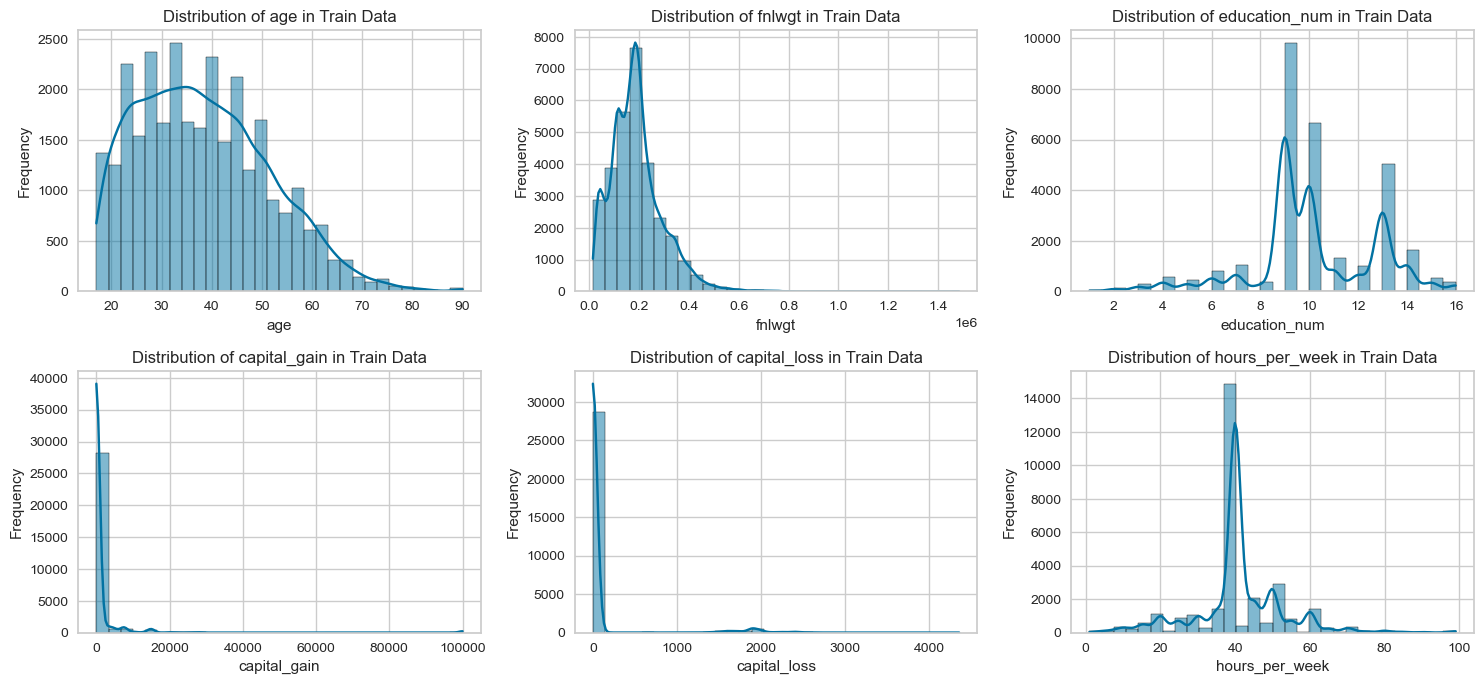

In [37]:
plot_numerical_distribution(train_df, dataset_name="Train Data")

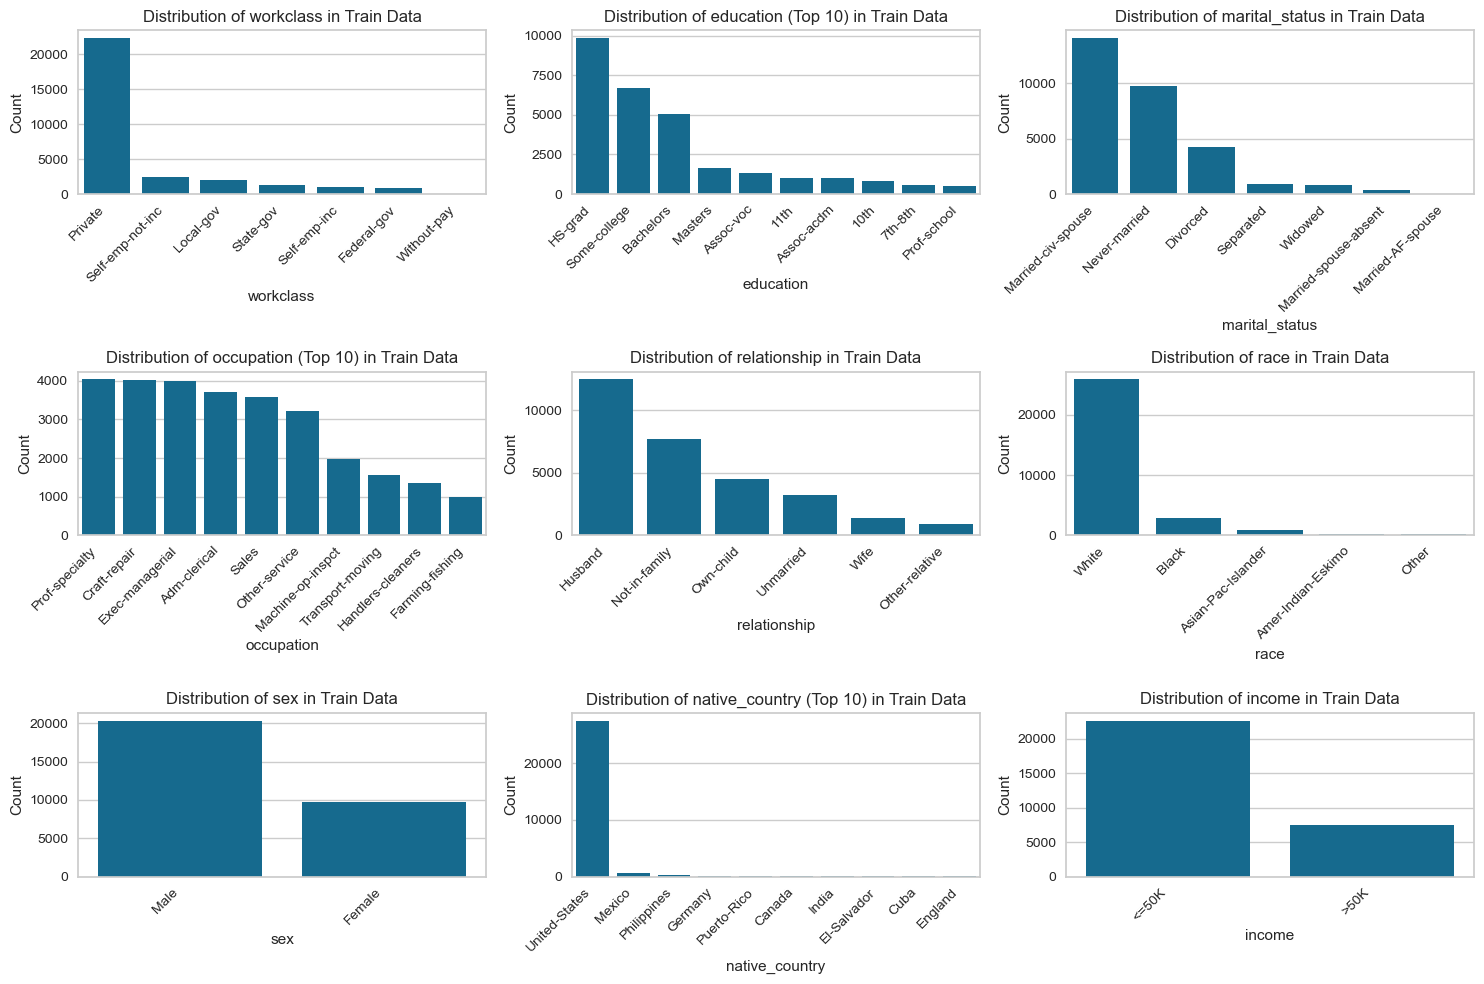

In [38]:
plot_categorical_distribution(train_df, top_n=10, dataset_name="Train Data")

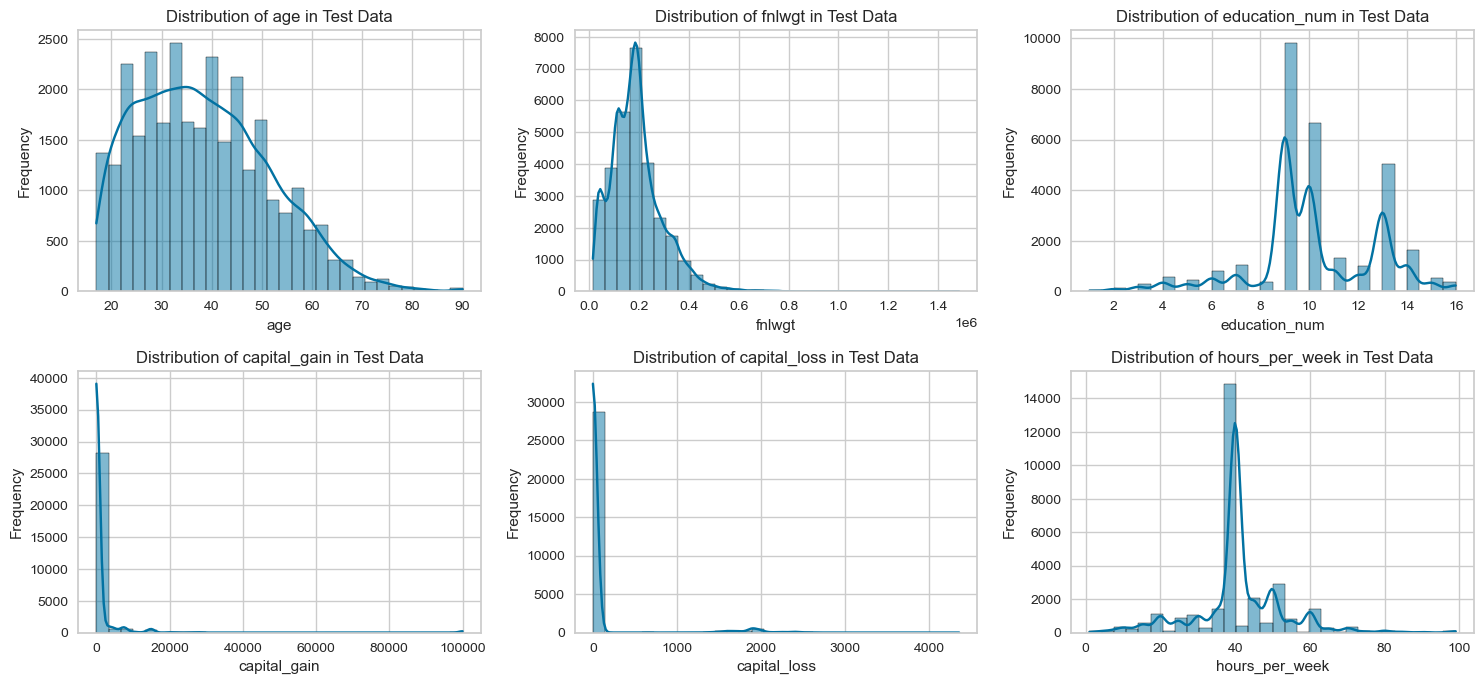

In [39]:
plot_numerical_distribution(train_df, dataset_name="Test Data")

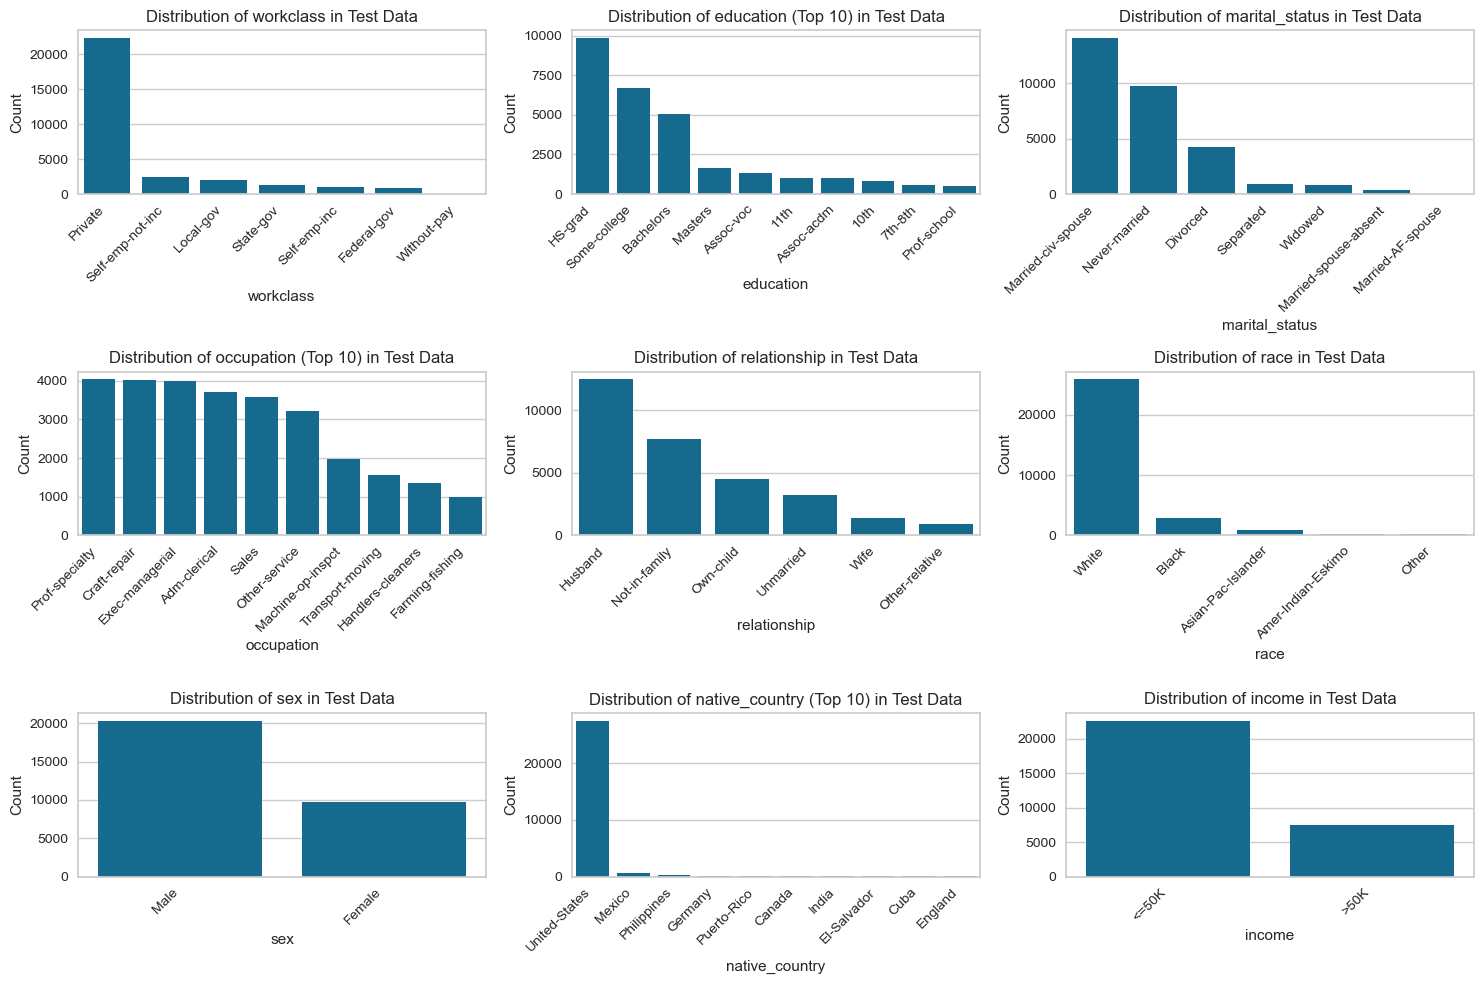

In [40]:
plot_categorical_distribution(train_df, top_n=10, dataset_name="Test Data")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

### **Cek dan Menangani Outliers pada Data**

#### **Cek Outliers**

In [41]:
def plot_outliers(df):
    numerical_features = df.select_dtypes(include="number").columns.tolist()

    plt.figure(figsize=(15,10))
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, x=feature)
        plt.title(f"Outlier in {feature}")
        plt.xlabel(feature)

    plt.tight_layout()
    plt.show()

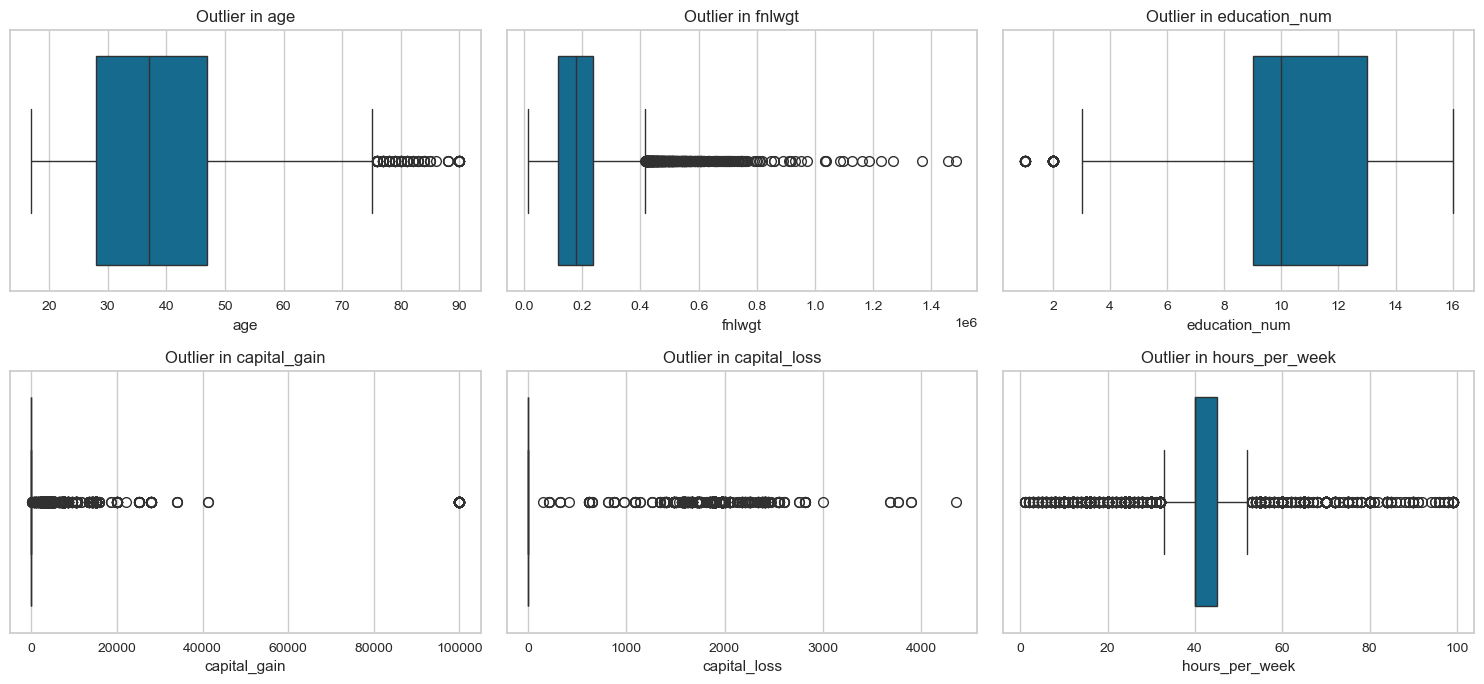

In [42]:
plot_outliers(train_df)

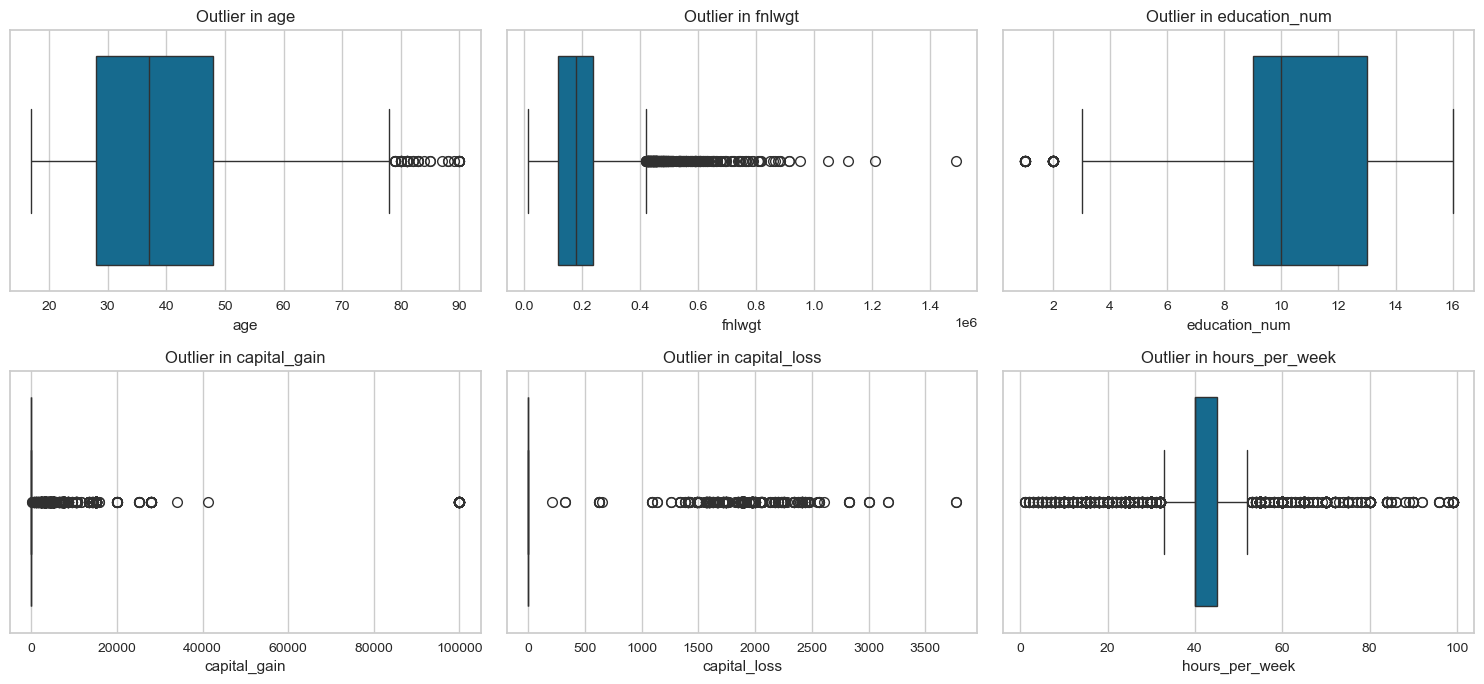

In [43]:
plot_outliers(test_df)

> Dari box plot, dapat dilihat bahwa terdapat banyak outlier. Sebelum menghapus outlier, penting untuk memastikan apakah hal tersebut benar-benar kesalahan dalam data atau tidak dengan memeriksa rentang normal untuk setiap fitur dan menganalisis rentang tersebut.

- **Rentang normal `age`**: 17 - 90 tahun
- **Rentang normal `fnlwgt`**: bervariasi, jadi tidak ada nilai outlier yang jelas
- **Rentang normal `education_num`**: 1 - 16 tahun
- **Rentang normal `capital_gain`**: biasanya 0, jika nilai sangat tinggi, itu mungkin merupakan outlier
- **Rentang normal `capital_loss`**: biasanya juga 0, jika nilai sangat tinggi, itu mungkin merupakan outlier
- **Rentang normal `hours_per_week`**: 1 - 99 jam per minggu

> Berdasarkan hasil analisis ini, dapat dikonfirmasi bahwa outlier ada di data `capital_gain` dan `capital_loss`. Untuk mengatasinya, teknik imputasi akan digunakan untuk mengganti outlier dengan nilai rata-rata (mean) pada masing-masing fitur.

#### **Teknik Imputasi untuk Mengganti Outliers**

In [44]:
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        mean_value = df[column].mean()

        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

In [45]:
columns_to_replace = ['capital_gain', 'capital_loss']
replace_outliers_with_mean(train_df, columns_to_replace)
replace_outliers_with_mean(test_df, columns_to_replace)

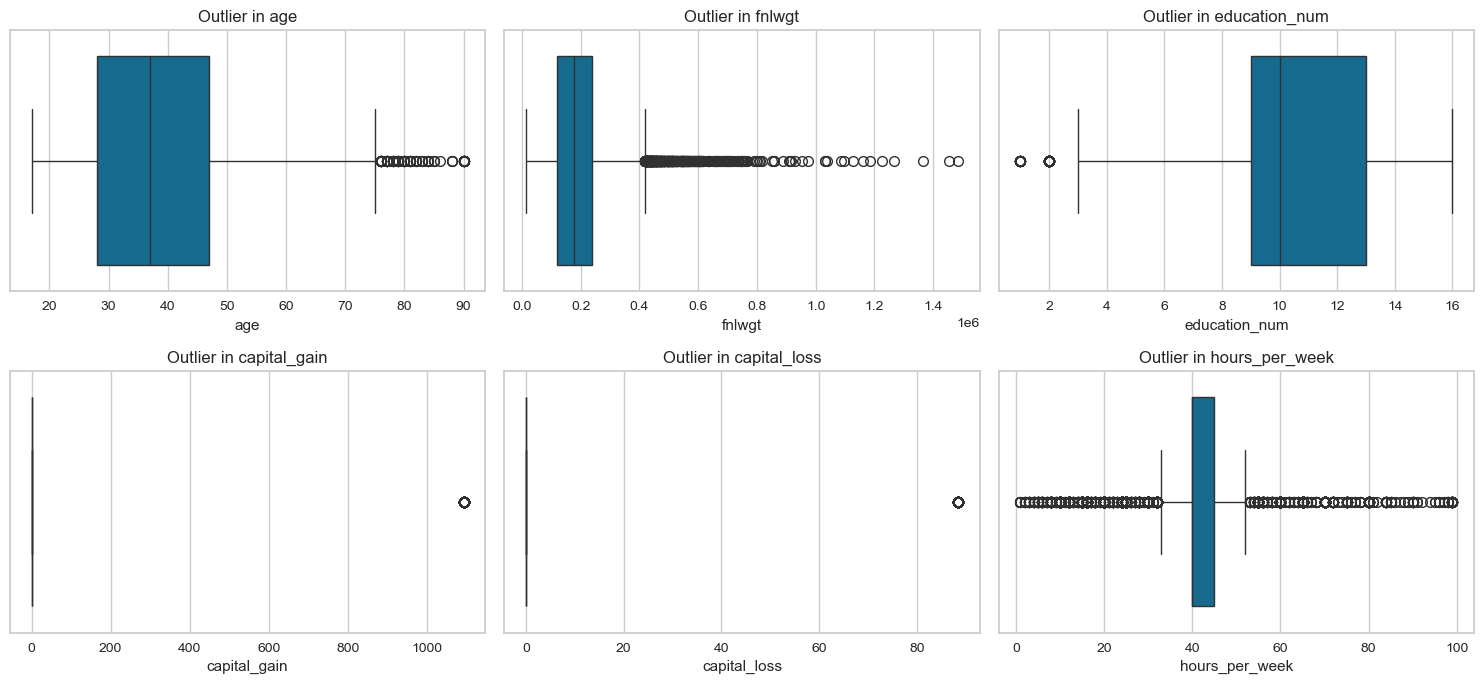

In [46]:
plot_outliers(train_df)

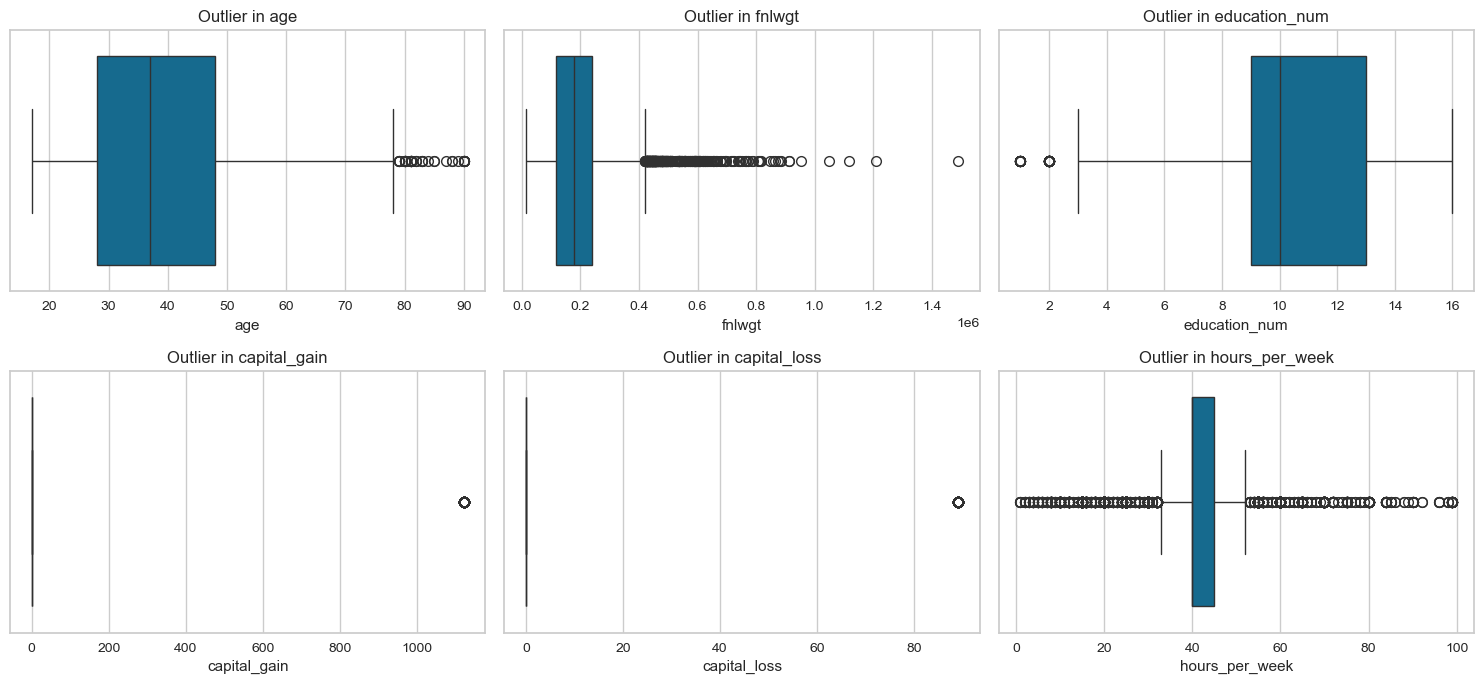

In [47]:
plot_outliers(test_df)

In [48]:
train_df.describe().round(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30139.00,30139.00,30139.00,30139.00,30139.00,30139.00
mean,38.44,189795.03,10.12,92.03,4.19,40.93
std,13.13,105658.62,2.55,303.49,18.78,11.98
min,17.00,13769.00,1.00,0.00,0.00,1.00
25%,28.00,117627.50,9.00,0.00,0.00,40.00
50%,37.00,178417.00,10.00,0.00,0.00,40.00
75%,47.00,237604.50,13.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,1092.84,88.44,99.00


In [49]:
test_df.describe().round(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15055.0,15055.0,15055.0,15055.00,15055.00,15055.0
mean,38.77,189623.4,10.11,93.20,4.22,40.95
std,13.38,105608.09,2.56,309.46,18.92,12.06
min,17.0,13492.0,1.0,0.00,0.00,1.0
25%,28.0,116657.0,9.0,0.00,0.00,40.0
50%,37.0,177955.0,10.0,0.00,0.00,40.0
75%,48.0,238589.5,13.0,0.00,0.00,45.0
max,90.0,1490400.0,16.0,1120.67,89.07,99.0


>Pada teknik imputasi yang telah dilakukan, nilai outlier akan diganti dengan nilai rata-rata (mean), karena menggantinya dengan batas minimum atau maksimum dari rentang interkuartil (IQR) atau dengan median mengakibatkan kurangnya distribusi data.

#### **Encoding Data Kategorikal**

> Sebelum melanjutkan ke proses selanjutnya, fitur kategorikal perlu diubah menjadi format numerik agar dapat diproses oleh algoritma clustering.

In [50]:
def encode_categorical(df):
    df_encoded = df.copy()

    categorical_cols = df_encoded.select_dtypes(include="object").columns

    le = LabelEncoder()

    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

In [51]:
train_df = encode_categorical(train_df)

In [52]:
test_df = encode_categorical(test_df)

In [53]:
original_train_df = train_df.copy()
original_test_df = test_df.copy()

In [54]:
original_train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,1092.841202,0.0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0.000000,0.0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0.000000,0.0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0.000000,0.0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0.000000,0.0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,2,257302,7,12,2,12,5,4,0,0.000000,0.0,38,38,0
30135,40,2,154374,11,9,2,6,0,4,1,0.000000,0.0,40,38,1
30136,58,2,151910,11,9,6,0,4,4,0,0.000000,0.0,40,38,0
30137,22,2,201490,11,9,4,0,3,4,1,0.000000,0.0,20,38,0


In [55]:
original_test_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,2,226802,1,7,4,6,3,2,1,0.000000,0.0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0.000000,0.0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0.000000,0.0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,1120.673663,0.0,40,37,1
4,34,2,198693,0,6,4,7,1,4,1,0.000000,0.0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,33,2,245211,9,13,4,9,3,4,1,0.000000,0.0,40,37,0
15051,39,2,215419,9,13,0,9,1,4,0,0.000000,0.0,36,37,0
15052,38,2,374983,9,13,2,9,0,4,1,0.000000,0.0,50,37,0
15053,44,2,83891,9,13,0,0,3,1,1,1120.673663,0.0,40,37,0


> Proses encoding menggunakan Label Encoder dari scikit-learn untuk mengubah semua fitur kategorikal menjadi format numerik.

#### **Feature Standardization**

> Sebelum melakukan clustering, penting untuk melakukan standarisasi data. Hal ini disebabkan karena fitur yang digunakan memiliki skala yang berbeda, yang dapat mempengaruhi hasil clustering. Selain itu, kinerja algoritma clustering umumnya lebih cepat ketika data dilakukan standarisasi, karena pola dalam data menjadi lebih jelas.

In [56]:
def standardize_features(df):
    scaler = MaxAbsScaler()

    numeric_columns = df.select_dtypes(include=["float", "int"]).columns
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

In [57]:
train_df = standardize_features(train_df)
test_df = standardize_features(test_df)

In [58]:
train_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.433333,0.833333,0.052210,0.600000,0.8125,0.666667,0.000000,0.2,1.0,1.0,1.0,0.0,0.404040,0.95,0.0
1,0.555556,0.666667,0.056113,0.600000,0.8125,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.131313,0.95,0.0
2,0.422222,0.333333,0.145245,0.733333,0.5625,0.000000,0.384615,0.2,1.0,1.0,0.0,0.0,0.404040,0.95,0.0
3,0.588889,0.333333,0.158093,0.066667,0.4375,0.333333,0.384615,0.0,0.5,1.0,0.0,0.0,0.404040,0.95,0.0
4,0.311111,0.333333,0.227930,0.600000,0.8125,0.333333,0.692308,1.0,0.5,0.0,0.0,0.0,0.404040,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.300000,0.333333,0.173302,0.466667,0.7500,0.333333,0.923077,1.0,1.0,0.0,0.0,0.0,0.383838,0.95,0.0
30135,0.444444,0.333333,0.103976,0.733333,0.5625,0.333333,0.461538,0.0,1.0,1.0,0.0,0.0,0.404040,0.95,1.0
30136,0.644444,0.333333,0.102317,0.733333,0.5625,1.000000,0.000000,0.8,1.0,0.0,0.0,0.0,0.404040,0.95,0.0
30137,0.244444,0.333333,0.135710,0.733333,0.5625,0.666667,0.000000,0.6,1.0,1.0,0.0,0.0,0.202020,0.95,0.0


In [59]:
test_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.277778,0.333333,0.152175,0.066667,0.4375,0.666667,0.461538,0.6,0.50,1.0,0.0,0.0,0.404040,0.948718,0.0
1,0.422222,0.333333,0.060262,0.733333,0.5625,0.333333,0.307692,0.0,1.00,1.0,0.0,0.0,0.505051,0.948718,0.0
2,0.311111,0.166667,0.226081,0.466667,0.7500,0.333333,0.769231,0.0,1.00,1.0,0.0,0.0,0.404040,0.948718,1.0
3,0.488889,0.333333,0.107570,1.000000,0.6250,0.333333,0.461538,0.0,0.50,1.0,1.0,0.0,0.404040,0.948718,1.0
4,0.377778,0.333333,0.133315,0.000000,0.3750,0.666667,0.538462,0.2,1.00,1.0,0.0,0.0,0.303030,0.948718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,0.366667,0.333333,0.164527,0.600000,0.8125,0.666667,0.692308,0.6,1.00,1.0,0.0,0.0,0.404040,0.948718,0.0
15051,0.433333,0.333333,0.144538,0.600000,0.8125,0.000000,0.692308,0.2,1.00,0.0,0.0,0.0,0.363636,0.948718,0.0
15052,0.422222,0.333333,0.251599,0.600000,0.8125,0.333333,0.692308,0.0,1.00,1.0,0.0,0.0,0.505051,0.948718,0.0
15053,0.488889,0.333333,0.056288,0.600000,0.8125,0.000000,0.000000,0.6,0.25,1.0,1.0,0.0,0.404040,0.948718,0.0


#### **Menggabungkan Train dan Test Sets Kedalam Satu Dataframe**

> Karena clustering tidak memiliki label, dataset yang terpisah tidak diperlukan. Oleh karena itu, train dan test set akan digabungkan menjadi satu dataFrame.

In [60]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)

In [61]:
combined_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.433333,0.833333,0.052210,0.600000,0.8125,0.666667,0.000000,0.2,1.00,1.0,1.0,0.0,0.404040,0.950000,0.0
1,0.555556,0.666667,0.056113,0.600000,0.8125,0.333333,0.230769,0.0,1.00,1.0,0.0,0.0,0.131313,0.950000,0.0
2,0.422222,0.333333,0.145245,0.733333,0.5625,0.000000,0.384615,0.2,1.00,1.0,0.0,0.0,0.404040,0.950000,0.0
3,0.588889,0.333333,0.158093,0.066667,0.4375,0.333333,0.384615,0.0,0.50,1.0,0.0,0.0,0.404040,0.950000,0.0
4,0.311111,0.333333,0.227930,0.600000,0.8125,0.333333,0.692308,1.0,0.50,0.0,0.0,0.0,0.404040,0.100000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,0.366667,0.333333,0.164527,0.600000,0.8125,0.666667,0.692308,0.6,1.00,1.0,0.0,0.0,0.404040,0.948718,0.0
45190,0.433333,0.333333,0.144538,0.600000,0.8125,0.000000,0.692308,0.2,1.00,0.0,0.0,0.0,0.363636,0.948718,0.0
45191,0.422222,0.333333,0.251599,0.600000,0.8125,0.333333,0.692308,0.0,1.00,1.0,0.0,0.0,0.505051,0.948718,0.0
45192,0.488889,0.333333,0.056288,0.600000,0.8125,0.000000,0.000000,0.6,0.25,1.0,1.0,0.0,0.404040,0.948718,0.0


In [62]:
combined_df.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000,45194.000000
mean,0.428353,0.367427,0.127632,0.687544,0.632444,0.430813,0.459236,0.282564,0.920050,0.675067,0.083861,0.047351,0.413548,0.909551,0.247953
std,0.146842,0.159727,0.071063,0.254456,0.159504,0.250082,0.309754,0.319495,0.208111,0.468355,0.277182,0.212392,0.121277,0.151989,0.431829
min,0.188889,0.000000,0.009053,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000
25%,0.311111,0.333333,0.078994,0.600000,0.562500,0.333333,0.153846,0.000000,1.000000,0.000000,0.000000,0.000000,0.404040,0.948718,0.000000
50%,0.411111,0.333333,0.119914,0.733333,0.625000,0.333333,0.461538,0.200000,1.000000,1.000000,0.000000,0.000000,0.404040,0.950000,0.000000
75%,0.522222,0.333333,0.160060,0.800000,0.812500,0.666667,0.692308,0.600000,1.000000,1.000000,0.000000,0.000000,0.454545,0.950000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> Setelah menggabungkan data train dan test, cek kembali missing values dan duplicate.

In [63]:
check_missing_and_duplicates(combined_df, "Combine")

No missing values found in Combine.
No duplicates found in Combine.


> Karena tidakt terdapat missing values atau duplicates maka data siap digunakan untuk clustering.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

> Awalnya, saya membuat cluster acak dengan total 10 cluster menggunakan algoritma K-Means. Ini dapat disesuaikan berdasarkan kinerja model selama proses clustering kedepannya.

In [64]:
n_clusters = 10

kmeans_not_optimized = KMeans(n_clusters=n_clusters, random_state=42)
combined_df['cluster1'] = kmeans_not_optimized.fit_predict(combined_df)

In [65]:
combined_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cluster1
0,0.433333,0.833333,0.052210,0.600000,0.8125,0.666667,0.000000,0.2,1.00,1.0,1.0,0.0,0.404040,0.950000,0.0,3
1,0.555556,0.666667,0.056113,0.600000,0.8125,0.333333,0.230769,0.0,1.00,1.0,0.0,0.0,0.131313,0.950000,0.0,4
2,0.422222,0.333333,0.145245,0.733333,0.5625,0.000000,0.384615,0.2,1.00,1.0,0.0,0.0,0.404040,0.950000,0.0,4
3,0.588889,0.333333,0.158093,0.066667,0.4375,0.333333,0.384615,0.0,0.50,1.0,0.0,0.0,0.404040,0.950000,0.0,4
4,0.311111,0.333333,0.227930,0.600000,0.8125,0.333333,0.692308,1.0,0.50,0.0,0.0,0.0,0.404040,0.100000,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,0.366667,0.333333,0.164527,0.600000,0.8125,0.666667,0.692308,0.6,1.00,1.0,0.0,0.0,0.404040,0.948718,0.0,0
45190,0.433333,0.333333,0.144538,0.600000,0.8125,0.000000,0.692308,0.2,1.00,0.0,0.0,0.0,0.363636,0.948718,0.0,8
45191,0.422222,0.333333,0.251599,0.600000,0.8125,0.333333,0.692308,0.0,1.00,1.0,0.0,0.0,0.505051,0.948718,0.0,7
45192,0.488889,0.333333,0.056288,0.600000,0.8125,0.000000,0.000000,0.6,0.25,1.0,1.0,0.0,0.404040,0.948718,0.0,3


In [66]:
silhouette_avg = silhouette_score(combined_df, combined_df['cluster1'])
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}')

Silhouette Score for 10 clusters: 0.52


> Skor Silhouette yang diperoleh adalah 0.52, ini belum cukup baik untuk clustering. Oleh karena itu, langkah selanjutnya adalah menggunakan Metode Elbow dan Silhouette Score untuk menentukan jumlah cluster yang optimal.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

#### **Mencari Optimal K (Cluster) Menggunakan Metode Elbow**

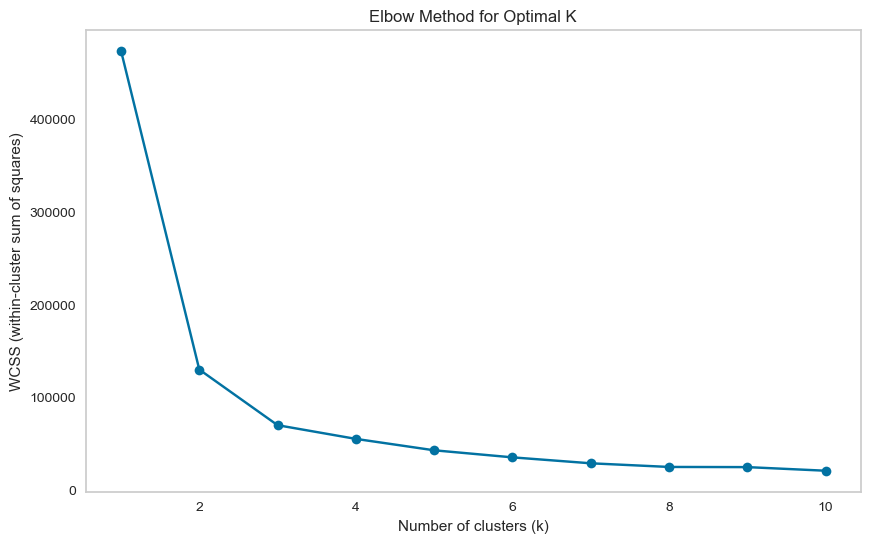

In [67]:
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(combined_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1, max_clusters + 1), wcss, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (within-cluster sum of squares)")
plt.grid()
plt.show()

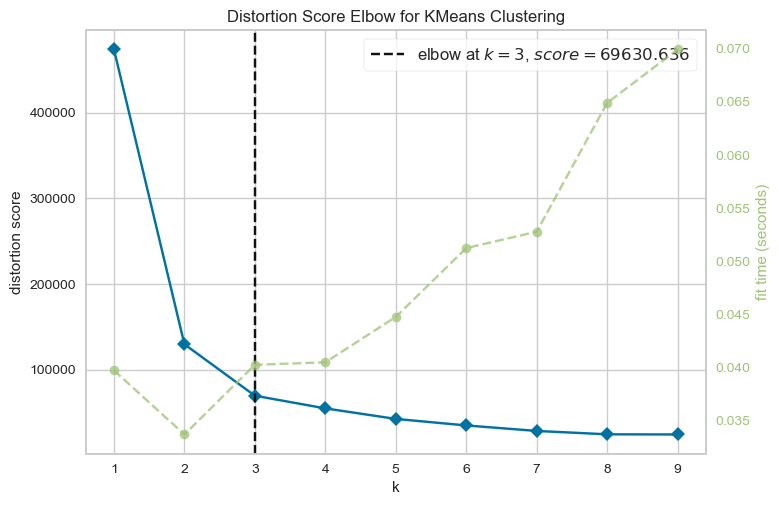

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(combined_df)
visualizer.show()

> Setelah melakukan metode Elbow, dapat dilihat bahwa WCSS menurun secara signifikan pada k = 1, 2, dan 3. Setelah itu, penurunannya tidak signifikan, sehingga nilai k (cluster) optimal yang akan dipilih untuk clustering adalah 3.

In [69]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
combined_df['cluster2'] = kmeans.fit_predict(combined_df)

In [70]:
silhouette_avg = silhouette_score(combined_df, combined_df['cluster2'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}')

Silhouette Score for 3 clusters: 0.60


In [71]:
joblib.dump(kmeans, 'Save Model/kmeans_elbow_method.pkl')

['Save Model/kmeans_elbow_method.pkl']

#### **Mencari Optimal K (Cluster) Menggunakan Silhouette Score**

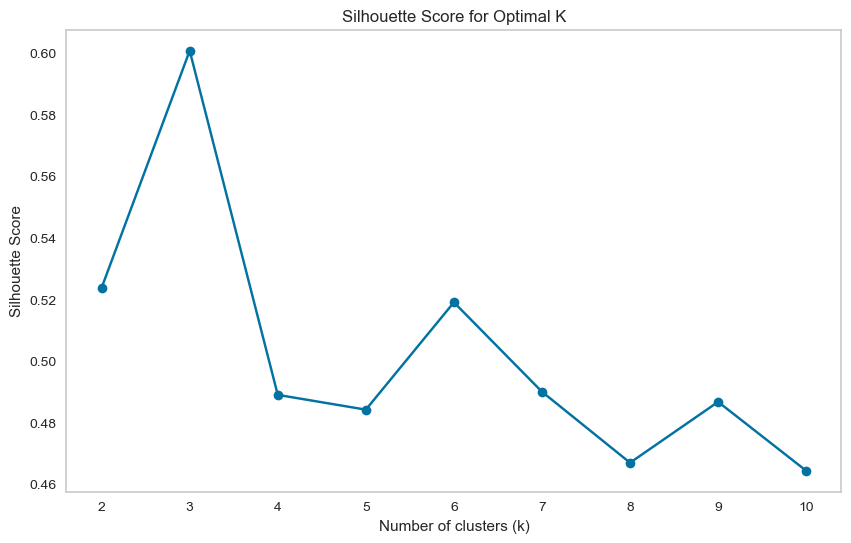

In [72]:
silhouette_scores = []
max_clusters = 10

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_df)
    silhouette_avg = silhouette_score(combined_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker="o")
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.xticks(np.arange(2, max_clusters + 1, 1))
plt.show()

In [73]:
best_score = max(silhouette_scores)
best_k = silhouette_scores.index(best_score) + 2
print(f'Silhouette Score for {best_k} clusters: {best_score:.2f}')

Silhouette Score for 3 clusters: 0.60


In [74]:
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
combined_df['cluster3'] = kmeans_best.fit_predict(combined_df)

joblib.dump(kmeans_best, 'Save Model/kmeans_silhouette_score.pkl')

['Save Model/kmeans_silhouette_score.pkl']

> Setelah mengoptimalkan model menggunakan metode elbow dan silhouette score, terdapat peningkatan silhouette score. Saat menggunakan k = 10, skor yang diperoleh adalah 0.52. Setelah menerapkan metode elbow dan silhouette score, k (cluster) optimal yang diperoleh adalah 3, dengan silhouette score meningkat dari 0.52 menjadi 0.60, yaitu mengalami kenaikan sebesar 0.08. Namun, targetnya adalah mencapai skor 0.70, sehingga optimasi lebih lanjut akan dilakukan melalui feature selection.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan untuk optimasi model clustering. Jika Anda menerapkan proses ini, maka silakan lakukan pembangunan model dan evaluasi menggunakan kolom hasil dari feature selection.

#### **Cek Korelasi untuk Feature Selection**

In [75]:
correlation_matrix = combined_df.corr().round(2)
correlation_matrix

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,cluster1,cluster2,cluster3
age,1.00,0.09,-0.08,-0.00,0.04,-0.27,-0.00,-0.25,0.02,0.08,0.12,0.05,0.10,-0.00,0.24,0.14,0.30,0.30
workclass,0.09,1.00,-0.03,0.02,0.04,-0.03,0.02,-0.07,0.05,0.07,0.01,0.00,0.05,0.00,0.02,0.03,0.06,0.06
fnlwgt,-0.08,-0.03,1.00,-0.03,-0.04,0.03,-0.00,0.01,-0.03,0.03,-0.01,-0.00,-0.02,-0.06,-0.01,-0.03,-0.03,-0.03
education,-0.00,0.02,-0.03,1.00,0.35,-0.04,-0.03,-0.01,0.01,-0.03,0.03,0.02,0.06,0.08,0.08,0.02,-0.03,-0.03
education_num,0.04,0.04,-0.04,0.35,1.00,-0.06,0.09,-0.09,0.03,0.00,0.12,0.08,0.15,0.09,0.33,0.14,0.04,0.04
marital_status,-0.27,-0.03,0.03,-0.04,-0.06,1.00,0.02,0.18,-0.07,-0.12,-0.06,-0.04,-0.18,-0.02,-0.19,-0.15,-0.36,-0.36
occupation,-0.00,0.02,-0.00,-0.03,0.09,0.02,1.00,-0.05,0.00,0.06,0.01,0.02,0.02,-0.00,0.05,0.67,0.02,0.02
relationship,-0.25,-0.07,0.01,-0.01,-0.09,0.18,-0.05,1.00,-0.12,-0.58,-0.08,-0.05,-0.26,-0.01,-0.25,-0.14,-0.52,-0.52
race,0.02,0.05,-0.03,0.01,0.03,-0.07,0.00,-0.12,1.00,0.09,0.02,0.02,0.04,0.13,0.07,0.01,0.08,0.08
sex,0.08,0.07,0.03,-0.03,0.00,-0.12,0.06,-0.58,0.09,1.00,0.06,0.04,0.23,-0.00,0.22,-0.17,0.34,0.34


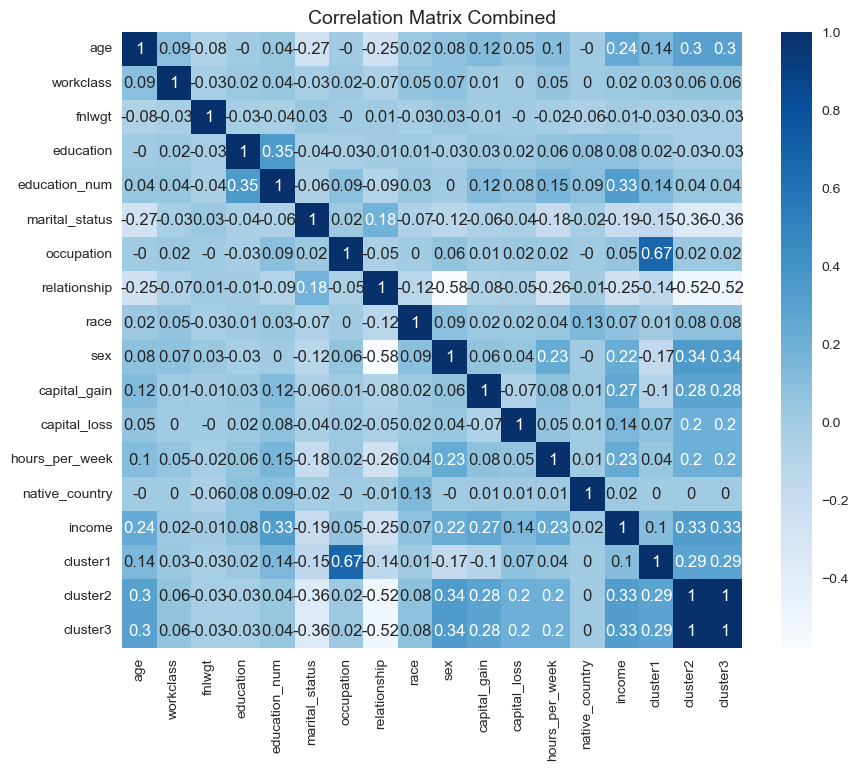

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix Combined", size=14)
plt.show()

> Berdasarkan correlation matrix, terdapat fitur-fitur dengan korelasi tinggi terhadap income sebagai berikut:

- **education_num**: Korelasi positif (0.33) menunjukkan bahwa tingkat pendidikan yang lebih tinggi berhubungan dengan pendapatan yang lebih tinggi.
- **capital_gain**: Korelasi positif (0.27) mengindikasikan bahwa individu dengan keuntungan modal yang lebih tinggi cenderung memiliki pendapatan yang lebih tinggi.
- **hours_per_week**: Korelasi positif (0.23) menunjukkan bahwa bekerja lebih banyak dalam segi jam per minggu kemungkinan besar akan meningkatkan pendapatan.
- **sex**: Korelasi positif (0.22) mengindikasikan bahwa terdapat perbedaan pendapatan berdasarkan jenis kelamin.
- **age**: Korelasi positif (0.24) menunjukkan bahwa pendapatan mungkin meningkat seiring bertambahnya usia.

In [77]:
selected_features = ['education_num', 'capital_gain', 'hours_per_week', 'sex', 'age']

new_df = combined_df[selected_features]

In [78]:
new_df

,education_num,capital_gain,hours_per_week,sex,age
0,0.8125,1.0,0.404040,1.0,0.433333
1,0.8125,0.0,0.131313,1.0,0.555556
2,0.5625,0.0,0.404040,1.0,0.422222
3,0.4375,0.0,0.404040,1.0,0.588889
4,0.8125,0.0,0.404040,0.0,0.311111
...,...,...,...,...,...
45189,0.8125,0.0,0.404040,1.0,0.366667
45190,0.8125,0.0,0.363636,0.0,0.433333
45191,0.8125,0.0,0.505051,1.0,0.422222
45192,0.8125,1.0,0.404040,1.0,0.488889


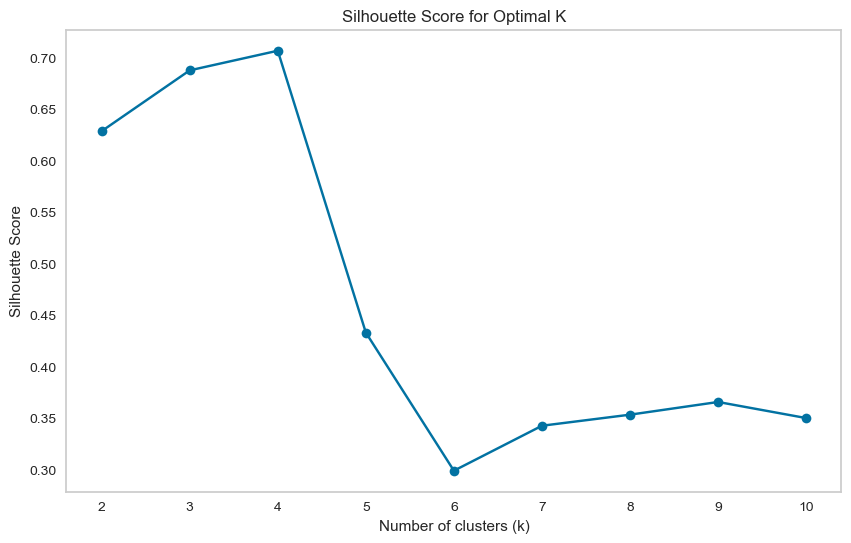

In [79]:
silhouette_scores = []
max_clusters = 10

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(new_df)
    silhouette_avg = silhouette_score(new_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker="o")
plt.title("Silhouette Score for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.xticks(np.arange(2, max_clusters + 1, 1))
plt.show()

In [80]:
best_score = max(silhouette_scores)
best_k = silhouette_scores.index(best_score) + 2
print(f'Best Silhouette Score for {best_k} clusters: {best_score:.2f}')

Best Silhouette Score for 4 clusters: 0.71


> Dapat dilihat bahwa silhouette score telah mencapai target, melebihi 0.70, dengan skor sebesar 0.71. Oleh karena itu, proses optimasi model dapat dianggap selesai.

In [81]:
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
new_df['cluster'] = kmeans_best.fit_predict(new_df)

joblib.dump(kmeans_best, 'Save Model/optimized_silhouette_score.pkl')

['Save Model/optimized_silhouette_score.pkl']

In [82]:
new_df

,education_num,capital_gain,hours_per_week,sex,age,cluster
0,0.8125,1.0,0.404040,1.0,0.433333,3
1,0.8125,0.0,0.131313,1.0,0.555556,0
2,0.5625,0.0,0.404040,1.0,0.422222,0
3,0.4375,0.0,0.404040,1.0,0.588889,0
4,0.8125,0.0,0.404040,0.0,0.311111,1
...,...,...,...,...,...,...
45189,0.8125,0.0,0.404040,1.0,0.366667,0
45190,0.8125,0.0,0.363636,0.0,0.433333,1
45191,0.8125,0.0,0.505051,1.0,0.422222,0
45192,0.8125,1.0,0.404040,1.0,0.488889,3


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Silhouette Score for 4 clusters: 0.71


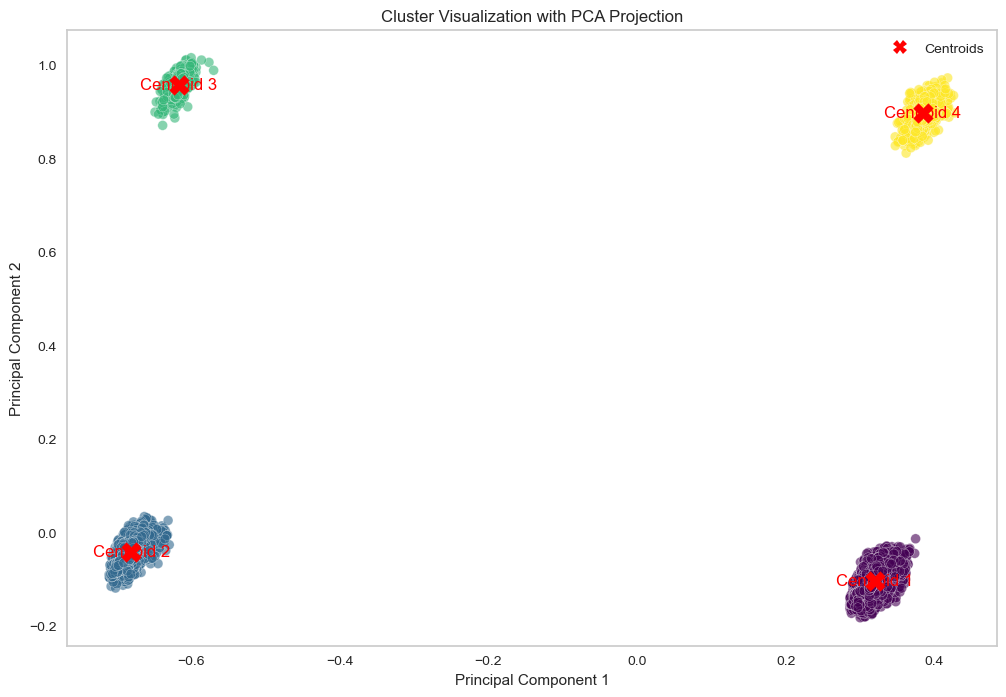

In [83]:
kmeans_best = joblib.load('Save Model/optimized_silhouette_score.pkl')

new_df['cluster'] = kmeans_best.labels_

pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_df[selected_features])

silhouette_avg = silhouette_score(new_df[selected_features], new_df['cluster'])
print(f'Silhouette Score for {best_k} clusters: {silhouette_avg:.2f}')

plt.figure(figsize=(12, 8))

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=new_df['cluster'], cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

centroids = kmeans_best.cluster_centers_
centroids_pca = pca.transform(centroids)

centroid_scatter = plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X')

for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i + 1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Cluster Visualization with PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

centroid_legend_handle = Line2D([0], [0], marker='X', color='w', label='Centroids', markerfacecolor='red', markersize=10)
plt.legend(handles=[centroid_legend_handle], loc='upper right')

plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [84]:
combined_df_original = pd.concat([original_train_df, original_test_df], ignore_index=True)
combined_df_original

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,1092.841202,0.0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0.000000,0.0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0.000000,0.0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0.000000,0.0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0.000000,0.0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45189,33,2,245211,9,13,4,9,3,4,1,0.000000,0.0,40,37,0
45190,39,2,215419,9,13,0,9,1,4,0,0.000000,0.0,36,37,0
45191,38,2,374983,9,13,2,9,0,4,1,0.000000,0.0,50,37,0
45192,44,2,83891,9,13,0,0,3,1,1,1120.673663,0.0,40,37,0


In [85]:
selected_columns = combined_df_original[['education_num', 'capital_gain', 'hours_per_week', 'sex', 'age']]
combined_df_final = pd.concat([selected_columns, new_df[['cluster']]], axis=1)

In [86]:
combined_df_final

,education_num,capital_gain,hours_per_week,sex,age,cluster
0,13,1092.841202,40,1,39,3
1,13,0.000000,13,1,50,0
2,9,0.000000,40,1,38,0
3,7,0.000000,40,1,53,0
4,13,0.000000,40,0,28,1
...,...,...,...,...,...,...
45189,13,0.000000,40,1,33,0
45190,13,0.000000,36,0,39,1
45191,13,0.000000,50,1,38,0
45192,13,1120.673663,40,1,44,3


In [114]:
statistics_summary = combined_df_final.groupby('cluster').describe()

statistics_summary = statistics_summary.transpose()

print("Statistik Deskriptif untuk Setiap Cluster:")
print(statistics_summary)

Statistik Deskriptif untuk Setiap Cluster:
cluster                       0          1            2            3
education_num  count    27570.0    13834.0        851.0       2939.0
               mean   10.018462  10.052696    10.985899    11.124872
               std     2.607127   2.349998     2.512049     2.688957
               min          1.0        1.0          1.0          1.0
               25%          9.0        9.0          9.0          9.0
               50%         10.0       10.0         10.0         11.0
               75%         12.0       12.0         13.0         13.0
               max         16.0       16.0         16.0         16.0
capital_gain   count    27570.0    13834.0        851.0       2939.0
               mean         0.0        0.0  1102.325825  1101.951385
               std          0.0        0.0    13.199509    13.062214
               min          0.0        0.0  1092.841202  1092.841202
               25%          0.0        0.0  1092.841202  109

### **Interpretasi Hasil**

#### 1. Cluster 1:
- **Jumlah Data:** 27.570 individu
- **Pendidikan (education_num):** Rata-rata 10.02, dengan sebagian besar individu memiliki pendidikan dasar (maksimum 16). Ini menunjukkan bahwa sebagian besar individu di cluster ini mungkin tidak memiliki pendidikan tinggi.
- **Capital Gain:** Semua individu di cluster ini tidak memiliki penghasilan kapital (mean = 0). Ini menunjukkan bahwa cluster ini terdiri dari individu yang mungkin tidak memiliki investasi atau sumber penghasilan tambahan.
- **Jam Kerja (hours_per_week):** Rata-rata 42.61 jam per minggu, menunjukkan bahwa individu di cluster ini mungkin bekerja penuh waktu.
- **Jenis Kelamin (sex):** Semua individu adalah pria (mean = 1), yang menunjukkan bahwa cluster ini sangat tidak seimbang dalam hal jenis kelamin.
- **Usia (age):** Rata-rata 38.78 tahun, dengan rentang usia yang luas (min = 17, max = 90). Cluster ini mungkin terdiri dari individu dalam fase kehidupan yang lebih dewasa.
- **Analisis:** Karakteristik individu di cluster ini menunjukkan adanya potensi risiko dalam ketidakstabilan ekonomi, karena latar belakang pendidikan yang rendah dan kurangnya penghasilan kapital dapat menyebabkan ketergantungan pada pekerjaan penuh waktu tanpa dukungan investasi.

#### 2. Cluster 2:
- **Jumlah Data:** 13.834 individu
- **Pendidikan (education_num):** Rata-rata 10.05, hampir sama dengan cluster 1, menunjukkan latar belakang pendidikan yang rendah.
- **Capital Gain:** Semua individu di cluster ini juga tidak memiliki penghasilan kapital (mean = 0).
- **Jam Kerja (hours_per_week):** Rata-rata 36.78 jam per minggu, menunjukkan bahwa cluster ini mungkin terdiri dari individu yang bekerja paruh waktu atau tidak sepenuhnya terlibat dalam pekerjaan.
- **Jenis Kelamin (sex):** Semua individu adalah wanita (mean = 0), menunjukkan ketidakseimbangan jenis kelamin yang signifikan.
- **Usia (age):** Rata-rata 36.70 tahun, dengan rentang usia yang juga luas.
- **Analisis:** Ketidakseimbangan gender di cluster ini dapat menyoroti tantangan yang dihadapi wanita dalam dunia kerja, termasuk akses pendidikan dan peluang kerja yang terbatas. Hal ini dapat mengarah pada pemahaman yang lebih baik tentang kebijakan yang mendukung kesetaraan gender.

#### 3. Cluster 3:
- **Jumlah Data:** 851 individu
- **Pendidikan (education_num):** Rata-rata 10.99, menunjukkan sedikit peningkatan dalam pendidikan dibandingkan dengan cluster sebelumnya. Ini menunjukkan bahwa beberapa individu di cluster ini mungkin memiliki pendidikan yang lebih baik.
- **Capital Gain:** Rata-rata 1.102,33 menunjukkan bahwa individu di cluster ini memiliki penghasilan kapital yang signifikan. Ini mungkin mencerminkan individu yang lebih terlibat dalam investasi.
- **Jam Kerja (hours_per_week):** Rata-rata 39.49 jam, menunjukkan bahwa individu di cluster ini mungkin memiliki keterlibatan pekerjaan yang lebih seimbang.
- **Jenis Kelamin (sex):** Semua individu adalah wanita (mean = 0), menunjukkan ketidakseimbangan dalam jenis kelamin.
- **Usia (age):** Rata-rata 41.71 tahun, menunjukkan bahwa individu di cluster ini sedikit lebih tua dibandingkan dengan cluster 2.
- **Analisis:** Cluster ini menunjukkan potensi untuk memiliki daya beli yang lebih tinggi, berkat penghasilan kapital yang lebih baik. Namun, ketidakseimbangan gender tetap menjadi tantangan yang harus diatasi agar potensi ini dapat dimanfaatkan secara optimal.

#### 4. Cluster 4:
- **Jumlah Data:** 2.939 individu
- **Pendidikan (education_num):** Rata-rata 11.12, menunjukkan bahwa individu di cluster ini memiliki tingkat pendidikan yang lebih tinggi dibandingkan dengan cluster lainnya.
- **Capital Gain:** Rata-rata 1.101,95 menunjukkan penghasilan kapital yang cukup tinggi, serupa dengan cluster 3. Hal ini dapat mencerminkan individu yang lebih berpengalaman dalam investasi.
- **Jam Kerja (hours_per_week):** Rata-rata 45.31 jam, menunjukkan bahwa individu di cluster ini mungkin lebih terlibat dalam pekerjaan dibandingkan dengan cluster lainnya.
- **Jenis Kelamin (sex):** Kombinasi pria dan wanita (mean = 1), menunjukkan adanya keseimbangan gender di cluster ini.
- **Usia (age):** Rata-rata 44.23 tahun, menunjukkan individu di cluster ini lebih tua, yang mungkin terkait dengan tingkat pendidikan dan penghasilan kapital yang lebih tinggi.
- **Analisis:** Cluster ini mencerminkan individu yang lebih stabil secara ekonomi, dengan pendidikan yang baik dan keterlibatan dalam investasi. Keseimbangan gender di cluster ini memberikan peluang untuk kolaborasi dan inovasi yang lebih besar, menciptakan lingkungan yang lebih inklusif untuk pengembangan ekonomi.

#### Kesimpulan Umum:
- **Karakteristik Cluster:** Cluster 1 dan 2 menunjukkan individu dengan latar belakang pendidikan yang rendah dan tidak memiliki penghasilan kapital, sedangkan Cluster 3 dan 4 menunjukkan adanya individu dengan penghasilan kapital yang lebih tinggi dan pendidikan yang lebih baik.
- **Polarisasi Jenis Kelamin:** Terdapat ketidakseimbangan jenis kelamin yang signifikan di cluster 1 dan 2, yang dapat menjadi pertimbangan dalam analisis lebih lanjut.
- **Pola Usia:** Usia rata-rata meningkat seiring dengan tingkat pendidikan dan penghasilan kapital, menunjukkan bahwa individu yang lebih tua mungkin memiliki lebih banyak pengalaman dan sumber daya.
- **Tantangan dan Peluang:** Pengamatan terhadap setiap cluster menunjukkan adanya tantangan dalam ketidaksetaraan pendidikan dan gender, serta peluang untuk meningkatkan akses terhadap investasi dan pendidikan yang lebih baik. Upaya kebijakan dapat difokuskan pada kelompok-kelompok yang kurang terlayani untuk meningkatkan kesejahteraan secara keseluruhan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [89]:
combined_df_final

,education_num,capital_gain,hours_per_week,sex,age,cluster
0,13,1092.841202,40,1,39,3
1,13,0.000000,13,1,50,0
2,9,0.000000,40,1,38,0
3,7,0.000000,40,1,53,0
4,13,0.000000,40,0,28,1
...,...,...,...,...,...,...
45189,13,0.000000,40,1,33,0
45190,13,0.000000,36,0,39,1
45191,13,0.000000,50,1,38,0
45192,13,1120.673663,40,1,44,3


In [90]:
combined_df_final.to_csv('Adult Income Dataset/final_data.csv', index=False)